<a href="https://colab.research.google.com/github/Hendrix8/Pig/blob/main/Assignment_3/A3_tem2405.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# uploading files to colab 
from google.colab import files
uploaded = files.upload()

Saving testset.csv to testset.csv
Saving dataset_3.csv to dataset_3.csv
Saving dataset_2.csv to dataset_2.csv
Saving dataset_1.csv to dataset_1.csv


In [205]:
# importing libraries
import numpy as np # for doing math calculations
from numpy import linalg as la 
import matplotlib.pyplot as plt # for plotting 
import pandas as pd # for creating dataframes
import io # for reading the files

In [206]:
df1 = pd.read_csv(io.BytesIO(uploaded['dataset_1.csv']), header=None)
df2 = pd.read_csv(io.BytesIO(uploaded['dataset_2.csv']), header=None)
df3 = pd.read_csv(io.BytesIO(uploaded['dataset_3.csv']), header=None)
df_test = pd.read_csv(io.BytesIO(uploaded['testset.csv']), header=None)

# Exercise 1 (20%): Parameter Estimation (MLE)
For this exercise you will use the dataset in the file ‘dataset_1.csv’. The dataset consists of 300 rows of 2-dimensional samples (the first two columns represent the data and the last column represents the label) which belong to 3 classes. The first 100 rows belong to the class ‘0’, the next 100 rows belong to the class ‘1’, and the last 100 rows belong to the class ‘2’.
We know that the samples of every class are drawn from a different Normal distribution. You are asked to use the Maximum Likelihood Estimation (MLE) technique to find the parameters of these 3 normal distributions. Note: 1) You will find one mean and one covariance matrix for each distribution (3 of each in total). 2) You are not allowed to use library functions (you can ONLY use them to check your results!). You are allowed to use basic functions for matrix operations like ‘np.sum’, ‘np.subtract’, ‘np.square’, etc.

In [207]:
# Creating np arrays from the dataset
x1 = df1.iloc[:, 0].tolist() # taking the first column and turning it to a list
x2 = df1.iloc[:, 1].tolist() # same for the second column 
x = np.array([x1, x2]) # creating a matrix with x1, x2
x = x.T # transposing the matrix of x data so that we have two columns of 300 elements 
y = np.array(df1.iloc[:, 2].tolist()) # taking the 3rd column turning it to an array

# cutting the x and y array according to classes

x_class_1 = x[0:100, :]
x_class_2 = x[100:200, :]
x_class_3 = x[200:300, :]

y_class_1 = y[0:100]
y_class_2 = y[100:200]
y_class_3 = y[200:300]

**Question** 1$ \, )$ 

Implement a python function named ‘calculate_mean(x)’, where x is an np
array of samples, that calculates and returns the mean of the samples.

In [208]:
def calculate_mean(x):
  mean_list = [] 
  col_num = x.shape[1] # the number of columns of x

  # iterating throuhg the columns of x, calculating the mean and 
  # adding it to the mean_list
  for col in range(col_num): 
    col_mean = np.sum(x[:, col]) / len(x[:, col])
    mean_list.append(col_mean)
  
  # reshaping the array
  mean_array = np.array(mean_list).reshape( (col_num), 1)
  return np.array(mean_array)

print("My function's results : \n", calculate_mean(x))
print("NumPy results : \n", np.array( [[ np.mean(x[:,0]), np.mean(x[:, 1]) ]]).T)

My function's results : 
 [[32.31967741]
 [28.64138664]]
NumPy results : 
 [[32.31967741]
 [28.64138664]]


**Question** 2 $ \,) $
 
 Implement a python function, named ‘calculate_variance_covariance(x)’ that
calculates and returns the variance-covariance matrix of the data (also called covariance matrix). If you are using library functions to check your results, note that the results may be slightly different (difference << 1). Do not panic, it happens :P.

We have that the covariance matrix is : $ Σ_{i,j} \, =  \mathbb{E} \, ( \, (x_i - μ_i) \cdot \, ( \, x_j - μ_j \, )^\intercal \, )$

In [209]:
def calculate_variance_covariance(x):
  cov_list = []
  row_num = x.shape[0]
  col_num = x.shape[1]
  mean_x = calculate_mean(x)

  # calculating the covariance matrix rows and then adding them
  # to the cov_list. np.subtract subtracts every element from every element
  # that is why we want the diagonal of the matrix it returns
  for row in range(row_num):
    x_minus_m = np.diag(np.subtract(x[row, :], mean_x))
    x_minus_m = x_minus_m.reshape(col_num, 1) # reshaping so that the dot product produces a matrix
    cov_list.append( np.dot(x_minus_m, x_minus_m.T) ) # putting all the matrices into a list
  
  return sum(cov_list) / row_num

print("My function's results : \n", calculate_variance_covariance(x))
print("NumPy results : \n", np.cov(x.T) )

My function's results : 
 [[ 54.94834719  32.65008377]
 [ 32.65008377 100.9060439 ]]
NumPy results : 
 [[ 55.13212093  32.75928138]
 [ 32.75928138 101.24352231]]


**Question** 3 $ \, ) $ 

Plot all 3 distributions in a single 3D plot. To create the 3D plot, use the same functions we used in the previous assignment (assignment 2) of this course. The result should look something like this:

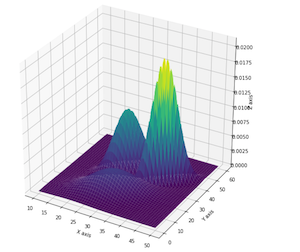

In [210]:
# defining the pdf of the normal distribution
def gauss2D(x, mean, covMatrix):
  n = len(x)
  x_minus_m = np.diag(np.subtract(x, mean))
  x_minus_m = x_minus_m.reshape(n, 1) # reshaping so that the dot product produces a matrix

  return np.exp(-1 / 2 * (x_minus_m).T @ la.inv(covMatrix) @ (x_minus_m)) /  \
         np.sqrt((2 * np.pi)**n * la.det(covMatrix))


# finding the parameters for each distribution 
theta_1 = [calculate_mean(x_class_1) , calculate_variance_covariance(x_class_1)]
theta_2 = [calculate_mean(x_class_2) , calculate_variance_covariance(x_class_2)]
theta_3 = [calculate_mean(x_class_3) , calculate_variance_covariance(x_class_3)]

In [259]:
# creating the x and y axes for the 3d plot 
xaxis = np.linspace(-10, 90, 100)
yaxis = np.linspace(-30, 70, 100)
X, Y = np.meshgrid(xaxis,yaxis)

# creating values to for inputing x's in gauss2D
x_val = []
for i in xaxis:
  for j in yaxis:
    x_val.append(np.array([i, j]))

# finding all the probabilities from the normal distributions and creating the 
# z axis for each one
Z_1 = np.array([gauss2D(x_i, theta_1[0], theta_1[1]) for x_i in x_val])
Z_2 = np.array([gauss2D(x_i, theta_2[0], theta_2[1]) for x_i in x_val])
Z_3 = np.array([gauss2D(x_i, theta_3[0], theta_3[1]) for x_i in x_val])

# reshaping the Z's so that the have the same shape with X and Y 
Z_1 = Z_1.reshape((100,100))
Z_2 = Z_2.reshape((100,100))
Z_3 = Z_3.reshape((100,100))

# adding Z's to make the final plot 
Z = Z_1 + Z_2 + Z_3

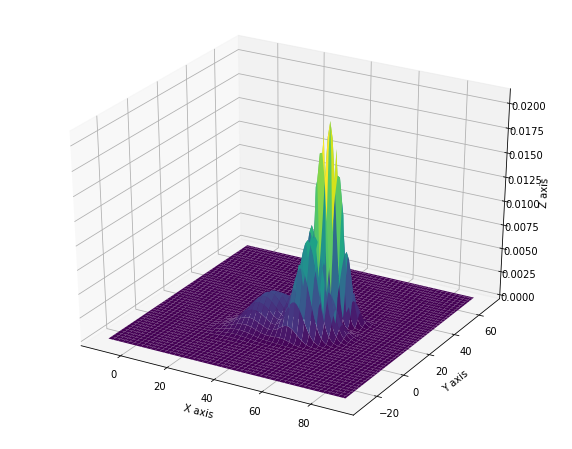

In [260]:
# ploting the distributions
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis',linewidth=0)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

#Exercise 2 (40%): Parzen Windows
In this exercise you are going to work with the dataset ‘dataset_2.csv’. It consists of 200 1-dimensional samples (200 rows, 1 column). Your task is to implement the Parzen (Parzen-Rosenblatt) window method to estimate the probability density function of the distribution of the data. Please complete the following steps in order (the steps are carefully designed to lead you to the result, so take your time to thoroughly understand each one)


In [261]:
# reading the second dataframe 
df2.head()

,0
0,0.444337
1,0.792534
2,2.545026
3,-2.240528
4,-3.414621


**Question** 1$ \, ) $ 

Define the window function φ(u). For this step you have to implement two
python functions, one that implements the window as a hypercube, namely ‘window_hypercube(u)’ and one that implements it as a gaussian kernel, namely ‘window_gaussian(u)’. You are not allowed to use any library functions to compute the pdf of the normal distribution. Note: These functions require only one argument ‘u’ which you may recall as a combination of x, x i, h (Lecture: Nonparametric Techniques). First, implement them for a single value ‘u’, and we will later expand them.

**Question** 2 $ \, ) $

Implement a function ‘window_phi(x, center, h, kernel)’, where x is a single point, center is a single point, h is the width of the window, and kernel is either ‘hypercube’ or ‘gaussian’. This should be a wrapper function that:
a. Computes the value ‘u’ (as seen in the lectures)
b. Calls the appropriate window function based on the argument kernel.
c. Returns the result.

**Question** 3 $ \, )$

Implement a function ‘delta(data, x, h, kernel)’, where data is a numpy array, and x is a single point. This is a wrapper function that calls the function ‘window_phi’ for multiple points, normalizes the results based on the size of the window (see lectures), and returns them. Note: As you might have understood by now, we calculate the likelihood of x (the center) based on its surrounding points (the data). In previous assignments we did that using the pdf of the corresponding distribution (remember assignment 1), but in this scenario, we have NO prior knowledge of the distribution of our data, thus we can’t use any general/known pdf.

**Question** 4 $ \, ) $

Implement a function ‘point_likelihood’ with the same exact arguments as the previous. This function should calculate the final likelihood of the point x (the center) given the data and the length of the window h and one of the defined kernels. (Make sure you understand what the result should be. The previous function would return multiple values for some data and a single center. How many arguments should this function return for the same argument? - see lectures)

**Question** 5 $ \, ) $

Now you should be ready to calculate the likelihood of a single point just by looking at its neighbors (without any prior knowledge of the distribution). However, all this time we have been talking about an argument h, namely the length of the window, which does not seem to have a single value. Well we have the absolute freedom to decide its value and we will find the most suitable one. Assume that the dataset you have comes from the normal distribution N(1,4) (this is a univariate normal distribution). Find the most suitable value for h based on that knowledge.

**a** $ \, ) $ Create a histogram of our data to convince yourselves that they actually come from the aforementioned distribution.

**b** $ \, ) $ For every h in the range [0.2, 10] with step = 0.1 (you can use the function np.arange) calculate 1) the predicted likelihood for every point in the data, 2) their true likelihood (you can use the function norm.pdf(data, loc=1, scale=4)), and 3) the Mean Square Error of the two likelihoods (predicted and true). Repeats this process for both kernels (hypercube and gaussian). Finally, print the most suitable value for h for each kernel and create a nice plot (for each kernel on the same figure) which shows the values for h on the x-axis and their MSE. The plot should look something like this:

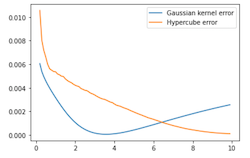

#Exercise 3 (40%): k-Nearest Neighbors Classifier

In this exercise you are going to develop a k-Nearest Neighbors (KNN) classifier. You are going to use the dataset ‘dataset_3.csv’ for training and the test set ‘testset.csv’ for testing. The files consist of 50 2-dimensional samples each along with their labels at the last column (50 rows and 3 columns). You are going to develop the classifier in 3 steps which you have to complete in the given order and finally you will test your classifier.

**Question**  1 $ \, ) $ 

Implement a function ‘calculate_euclidean(x, train)’, where x is a single point
and train is a numpy array of points. This function should return the euclidean distance of x to all points in train. Do not use any library functions except for basic matrix operations.

**Question**  2 $ \, ) $ 

Implement a function ‘find_neighbors(x, train, k)’, where k is the number of neighbors. This function should calculate the distance of x to all points in train (using the function you implemented in the previous step), sort them in descending order, and return the k top points from train (the k-nearest neighbors to x).

Question 3 $ \, ) $

Implement a function ‘predict(test_points, train, k)’, test_points is a numpy array of points. This function should call the find_neighbors function for each point in test_points and then calculate their probability of belonging to class 0 or to class 1 (these probabilities should add to 1). Finally, it should return two probabilities for each point in test_points.

**Question** 4 $ \, ) $

At this point you have successfully implemented the KNN classifier. Now you will use the test set to find the best value for k and its accuracy. For k ranging in $ \,[1, 30 \, ]$ calculate the accuracy of each classifier using the data from the ‘testset.csv’ file. Print the best value for k along with its accuracy and create a plot with the values for k on the x-axis and their accuracy on the y-axis. The plot should look something like this:


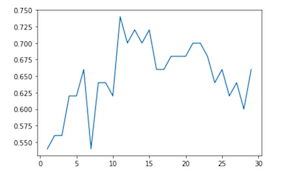


Question 5 $ \, ) $

(Bonus 10%) Finally, you will plot the decision boundaries of the best classifier (using the value for k you found in the previous question). Create a grid around the points of the training set. Predict every single point of the grid. Use the function ‘plt.contourf’ to plot the decision areas. The final plot should look something like this:


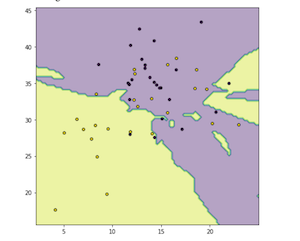